In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
batch_size = 4

trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True,
    download=True, 
    transform=torchvision.transforms.ToTensor()
)
train_loader = torch.utils.data.DataLoader(
    trainset, 
    batch_size=batch_size,
    shuffle=True
)

testset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=False,
    download=True, 
    transform=torchvision.transforms.ToTensor()
)
test_loader = torch.utils.data.DataLoader(
    testset, 
    batch_size=batch_size,
    shuffle=False
)

classes = trainset.classes
classes

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

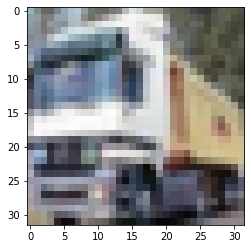

In [3]:
import matplotlib.pyplot as plt

images=train_loader.dataset[1][0]
plt.imshow(images.permute(1, 2, 0))

In [4]:
images.size() # [3, 32, 32]: 3 -> RGB, 32x32 

torch.Size([3, 32, 32])

In [7]:
import matplotlib.pyplot as plt

In [8]:
train_data = torchvision.datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = torchvision.transforms.ToTensor(), 
    download = True,            
)
test_data = torchvision.datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = torchvision.transforms.ToTensor()
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [9]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [10]:
batch_size = 100
train_loader = torch.utils.data.DataLoader(
    dataset = train_data,
    batch_size = batch_size,
    shuffle = True
)
test_loader = torch.utils.data.DataLoader(
    dataset = test_data,
    batch_size = batch_size,
    shuffle = False
)

In [11]:
import torch.nn as nn
class cnn(nn.Module): 
    def __init__(self): 
        super(cnn, self).__init__() 
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3, padding=1) 
        self.conv2 = nn.Conv2d(12, 24, 3, padding=1)
        self.fc1 = nn.Linear(7*7*24, 128)
        self.fc2 = nn.Linear(128,10)

    def forward(self, x):
        x = self.conv1(x) 
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2) 
        x = self.conv2(x) 
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2) 
               
        x = torch.flatten(x,1)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        x = nn.functional.softmax(x,dim=1)
        return x

In [12]:
model = cnn()

#손실값
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [13]:
class Print(nn.Module):
    def forward(self, x):
        print(x.size())
        return x

In [14]:
model

cnn(
  (conv1): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1176, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [15]:
def train(model, criterion, optimizer, data):
    model.train() # training
    for X,y in data:
        y_pred = model(X)
        loss = criterion(y_pred,y)
        
        optimizer.zero_grad() #미분값 초기화
        loss.backward() 
        optimizer.step()

In [16]:
train(model, criterion, optimizer, train_loader)

In [17]:
def evaluation(model, criterion, optimizer, data):
    model.eval()
    test_loss = 0
    accuracy = 0

    with torch.no_grad():
        for X, y in data:
            y_pred = model(X)
            test_loss += criterion(y_pred, y)
            
            prediction = y_pred.max(1)[1] 
            corrects = (prediction == y)
            accuracy += corrects.sum().float() / float( y.size(0) )
    return test_loss, accuracy    

In [18]:
nums_epoch = 10
for epoch in range(nums_epoch):
    train(model, criterion, optimizer, train_loader)
    
    if(epoch%2==0):
        E, accu = evaluation(model, criterion, optimizer, test_loader)
        print(epoch, "loss=", E.item(), "accu=", accu.item())

0 loss= 149.00340270996094 accu= 97.29999542236328
2 loss= 148.30419921875 accu= 97.83000183105469
4 loss= 147.9647979736328 accu= 98.23999786376953
6 loss= 147.85043334960938 accu= 98.34999084472656
8 loss= 147.58351135253906 accu= 98.58000946044922


MNIST를 통해 이미지 분류를 한 결과, 최종 결과값으로 98.58의 정확성을 도출하였다.
이 결과값은 상당히 높은 수준의 정확성을 나타낸다.